# Statistical Analysis

Adam Benson <br>
CLaSP 405-002 <br>
Final Project

This notebook performs statistical analysis on US shark attack, total population, and land temperature anomaly data from 1960-2017


Specifically, I will explore distributions and produce summarizing statistics as well as performe two simple linear regressions and one boostrapping analysis

In [3]:
## Import Statements
import pandas as pd                  # DataFrame for analysis
import numpy as np                   # for numerical precision in quantitative operations
import seaborn as sns                # for more stylish plotting
import matplotlib.pyplot as plt      # for basic plotting

import linereg  as lr                #for calculating the error
                                     #on linear fits
    
from scipy import stats              #for linear regression (least-squares fit)
from scipy.stats import skew, kurtosis, norm #for analyzing distributions of data 

import statistics                    # for Mode

import datetime as dt                # for datetime objects

sns.set_style("darkgrid",
              {'axes.grid' : False})# setting a dark grid style for all visualizations
                                    # removing annoying grid lines

# for visualizations to appear in this notebook
%matplotlib inline

## Loading Shark Analysis Data

In [5]:
## creating DataFrame from CSV file produced during Exploratory Phase
sharkAnalysis = pd.read_csv('SharkAnalysis.csv')

## inspecting DataFrame loaded properly
sharkAnalysis.head()

,Unnamed: 0,Total Attacks,Temp Anomaly (F),Total Population,Normalized Data,Colors,Upper Confidence,Lower Confidence,N Upper Confidence,N Lower Confidence
0,1960,25,0.08,180671000.0,1.383731,#C6221E,30.000000,20.000000,1.660477,1.106985
1,1961,17,-0.56,183691000.0,0.925467,#2592D1,21.123106,12.876894,1.149926,0.701008
2,1962,21,-0.38,186538000.0,1.125776,#2592D1,25.582576,16.417424,1.371440,0.880112
3,1963,11,-0.33,189242000.0,0.581266,#2592D1,14.316625,7.683375,0.756525,0.406008
4,1964,14,0.83,191889000.0,0.729588,#C6221E,17.741657,10.258343,0.924579,0.534598


In [6]:
sharkAnalysis.rename(columns={'Unnamed: 0': 'Year'}, inplace=True)
sharkAnalysis.index = pd.to_datetime(sharkAnalysis['Year'], infer_datetime_format=False,
                                    format = '%Y')

sharkAnalysis.drop('Year', axis='columns', inplace=True)

In [7]:
sharkAnalysis.head()

,Total Attacks,Temp Anomaly (F),Total Population,Normalized Data,Colors,Upper Confidence,Lower Confidence,N Upper Confidence,N Lower Confidence
Year,,,,,,,,,
1960-01-01,25,0.08,180671000.0,1.383731,#C6221E,30.000000,20.000000,1.660477,1.106985
1961-01-01,17,-0.56,183691000.0,0.925467,#2592D1,21.123106,12.876894,1.149926,0.701008
1962-01-01,21,-0.38,186538000.0,1.125776,#2592D1,25.582576,16.417424,1.371440,0.880112
1963-01-01,11,-0.33,189242000.0,0.581266,#2592D1,14.316625,7.683375,0.756525,0.406008
1964-01-01,14,0.83,191889000.0,0.729588,#C6221E,17.741657,10.258343,0.924579,0.534598


## Distributions of Data

#### Shark Attack Distribution

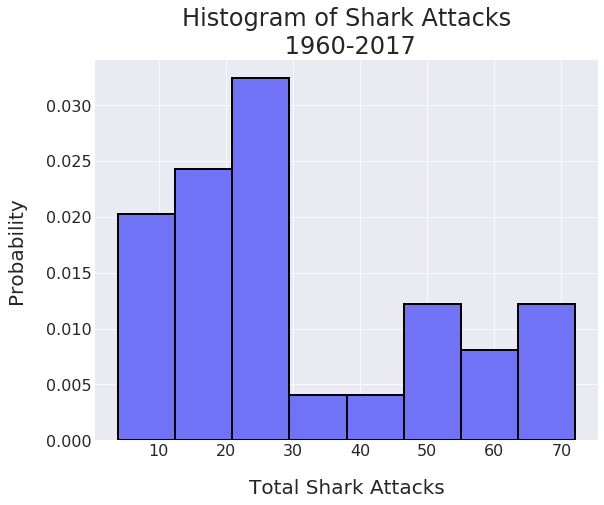

In [8]:
fig = plt.figure(figsize=(9,7))


 ## using sqrt rule for # bins. (minimum number of bins)
sharkAnalysis['Total Attacks'].hist(normed=True,
                                    bins=int(np.ceil(np.sqrt(len(sharkAnalysis['Total Attacks'])))),
                                    color = '#7173F6', edgecolor="k", linewidth = 2.0) 


plt.title("Histogram of Shark Attacks\n 1960-2017", fontsize=24)

plt.xticks(fontsize=16)
plt.yticks(fontsize=16)

plt.ylabel("Probability", fontsize=20, labelpad=20)
plt.xlabel("Total Shark Attacks", fontsize=20, labelpad=20)

plt.savefig("SharkAttacksHistogram.png", bbox_inches="tight")

plt.show()

In [13]:
### Skew, Kurtosis, Mean, Median, Mode, std

attacksSTD = np.round(np.std(sharkAnalysis['Total Attacks'], ddof=1,), 2)
attacksMean = np.round(np.mean(sharkAnalysis['Total Attacks']), 2)
attacksMode = np.round(statistics.mode(sharkAnalysis['Total Attacks']), 2)
attacksSkew = np.round(skew(sharkAnalysis['Total Attacks']), 2)
attacksKurtosis = np.round(kurtosis(sharkAnalysis['Total Attacks'], fisher=False), 2)

sharkStats = sharkAnalysis['Total Attacks'].describe()

sharkStatsDF = pd.DataFrame(sharkStats)

sharkStatsDF

,Total Attacks
count,58.000000
mean,30.086207
std,19.625694
min,4.000000
25%,15.000000
50%,23.000000
75%,48.750000
max,72.000000


In [14]:
print("Shark Attack Statistics:\n" +
      "Mean: {}, Mode: {}, Std: {}\n".format(attacksMean, attacksMode, attacksSTD) +
      "Skew: {}, Kurtosis: {}".format(attacksSkew, attacksKurtosis))

Shark Attack Statistics:
Mean: 30.09, Mode: 9, Std: 19.63
Skew: 0.68, Kurtosis: 2.1


#### Temperature Distribution

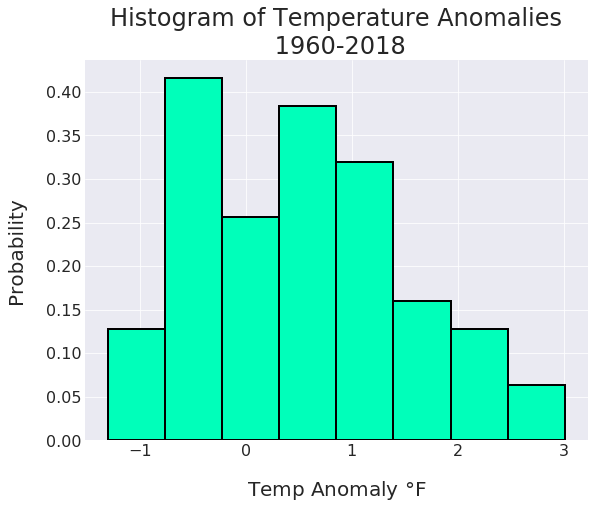

In [114]:
fig = plt.figure(figsize=(9,7))


 ## using sqrt rule for # bins. (minimum number of bins)
sharkAnalysis['Temp Anomaly (F)'].hist(normed=True,
                                    bins=int(np.ceil(np.sqrt(len(sharkAnalysis['Temp Anomaly (F)'])))),
                                    color = '#00FFBA', edgecolor="k", linewidth = 2.0) 


plt.title("Histogram of Temperature Anomalies\n 1960-2018", fontsize=24)

plt.xticks(fontsize=16)
plt.yticks(fontsize=16)

plt.ylabel("Probability", fontsize=20, labelpad=20)
plt.xlabel("Temp Anomaly $\degree$F", fontsize=20, labelpad=20)

plt.savefig("TempAnomaliesHistogram.png", bbox_inches="tight")

plt.show()

In [15]:
### Skew, Kurtosis, Mean, Median, Mode, std
tempSTD = np.round(np.std(sharkAnalysis['Temp Anomaly (F)'], ddof=1), 2)
tempMean = np.round(np.mean(sharkAnalysis['Temp Anomaly (F)']), 2)
tempSkew = np.round(skew(sharkAnalysis['Temp Anomaly (F)']), 2)
tempKurtosis = np.round(kurtosis(sharkAnalysis['Temp Anomaly (F)'], fisher=False), 2)

In [16]:
sharkAnalysis['Temp Anomaly (F)'].describe()

count    58.000000
mean      0.495172
std       1.004950
min      -1.300000
25%      -0.320000
50%       0.355000
75%       1.057500
max       3.010000
Name: Temp Anomaly (F), dtype: float64

In [17]:
print("Shark Attack Statistics:\n" +
      "Mean: {}, Mode: {}, Std: {}\n".format(tempMean, "1.03, .34, -.32", tempSTD) +
      "Skew: {}, Kurtosis: {}".format(tempSkew, tempKurtosis))

Shark Attack Statistics:
Mean: 0.5, Mode: 1.03, .34, -.32, Std: 1.0
Skew: 0.49, Kurtosis: 2.67


# STATISTICAL METHODS

## Total Attacks and Temperature Anomalies

### Linear Regression + Pearson Correlation Coefficient

In [20]:
## Pearson Correlation Coefficient
pearson = sharkAnalysis['Temp Anomaly (F)'].corr(sharkAnalysis['Total Attacks'], method='pearson')
print("Temp Anomaly and Total Shark Attacks\nPearson Correlation Coefficient: ", np.round(pearson, 2))

Temp Anomaly and Total Shark Attacks
Pearson Correlation Coefficient:  0.74


In [108]:
slope, intercept, rval, pval, stderr = stats.linregress(sharkAnalysis['Temp Anomaly (F)'],
                                                        sharkAnalysis['Total Attacks'])

In [112]:
x      = sharkAnalysis['Temp Anomaly (F)'] 
yModel = intercept +  slope * x
yData  = sharkAnalysis['Total Attacks']

#error on y values
RMSE = lr.calcRMSE(yModel, yData)

#error on coefficents, slope and y-intercept and.
errSlope, errInter = lr.calcCoeffsErr(x, RMSE)

Fit Report: 
 	Uncertainty on Y: +/- 13.29
 	Intercept: 22.92 +/- 1.95
	Slope: 14.47 +/- 1.75
	Pearson Linear Correlation: 0.74


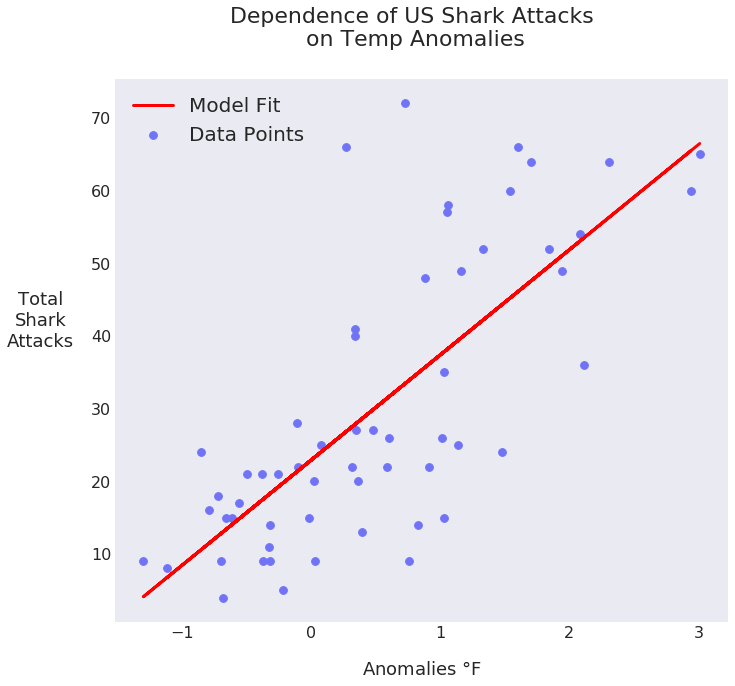

In [128]:
fig=plt.figure(figsize=(11,10))

plt.scatter(sharkAnalysis['Temp Anomaly (F)'], sharkAnalysis['Total Attacks'],
            label='Data Points', s=60, color='#7173F6')



plt.plot(sharkAnalysis['Temp Anomaly (F)'], intercept +  slope * sharkAnalysis['Temp Anomaly (F)'], 
        color = 'r', linewidth = 3.0, label="Model Fit")

print("Fit Report: \n \tUncertainty on Y: +/- {:.2f}".format(RMSE) + 
      "\n \tIntercept: {:.2f} +/- {:.2f}".format(intercept, errInter)
      + "\n\tSlope: {:.2f} +/- {:.2f}".format(slope, errSlope) +
      "\n\tPearson Linear Correlation: {:.2f}".format(rval))




plt.suptitle("Dependence of US Shark Attacks\n on Temp Anomalies", fontsize=22)

plt.xlabel('Anomalies $\degree$F', fontsize=18, labelpad=20)
plt.ylabel('Total\nShark\nAttacks', fontsize=18, rotation=0, labelpad=50)

plt.xticks(fontsize=16)
plt.yticks(fontsize=16)

plt.legend(prop={'size':20}, loc='best')

plt.savefig("TempsAttacksRegression.png", bbox_inches="tight")

plt.show()

#### Seaborn Plots

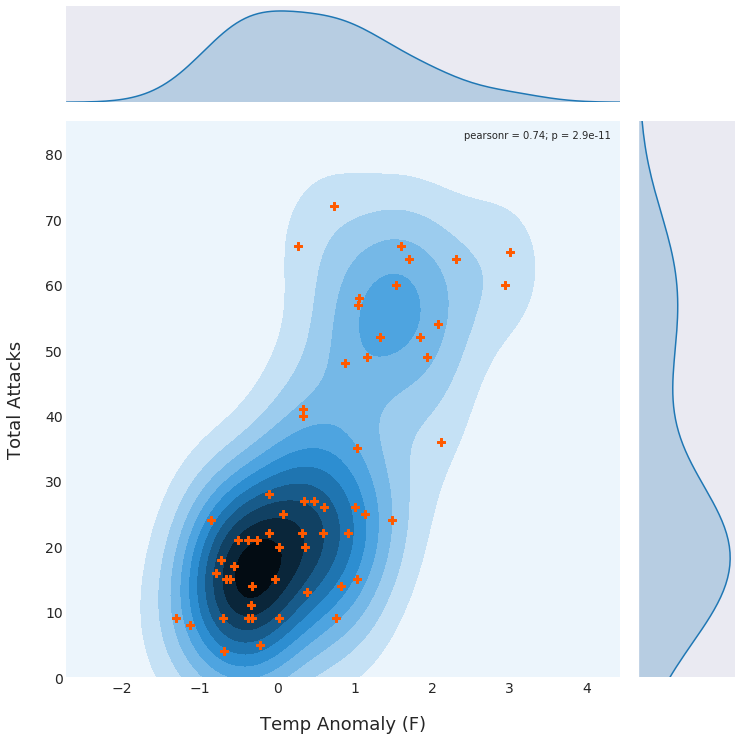

In [103]:
t = sns.jointplot(x="Temp Anomaly (F)", y="Total Attacks", data=sharkAnalysis, kind='kde', ylim=(0,85), size=10)

t.plot_joint(plt.scatter, c="#FF5A00", s=50, linewidth=1, marker="P")


plt.xticks(fontsize=14)
plt.yticks(fontsize=14)

plt.ylabel("Total Attacks", fontsize=18, labelpad=20)
plt.xlabel("Temp Anomaly (F)", fontsize=18, labelpad=20)

plt.savefig("KDEAttacksTemps.png", bbox_inches="tight")

plt.show()

## Total Attacks and Total Population

### Linear Regression + Pearson Correlation Coefficient

In [59]:
## Pearson Correlation Coefficient
pearson = sharkAnalysis['Total Population'].corr(sharkAnalysis['Total Attacks'], method='pearson')
print("Total Population and Total Shark Attacks\nPearson Correlation Coefficient: ", np.round(pearson, 2))

Total Population and Total Shark Attacks
Pearson Correlation Coefficient:  0.88


In [60]:
## dividing by 100 million

slope, intercept, rval, pval, stderr = stats.linregress(sharkAnalysis['Total Population'] / 100000000,
                                                        sharkAnalysis['Total Attacks'])

In [61]:

x      = sharkAnalysis['Total Population'] / 100000000
yModel = intercept +  slope * x
yData  = sharkAnalysis['Total Attacks']

#error on y values
RMSE = lr.calcRMSE(yModel, yData)

#error on coefficents, slope and y-intercept and.
errSlope, errInter = lr.calcCoeffsErr(x, RMSE)

Fit Report: 
 	Uncertainty on Y: +/- 9.48
 	Intercept: -69.35 +/- 7.35
	Slope: 39.57 +/- 2.88
	Pearson Linear Correlation: 0.88


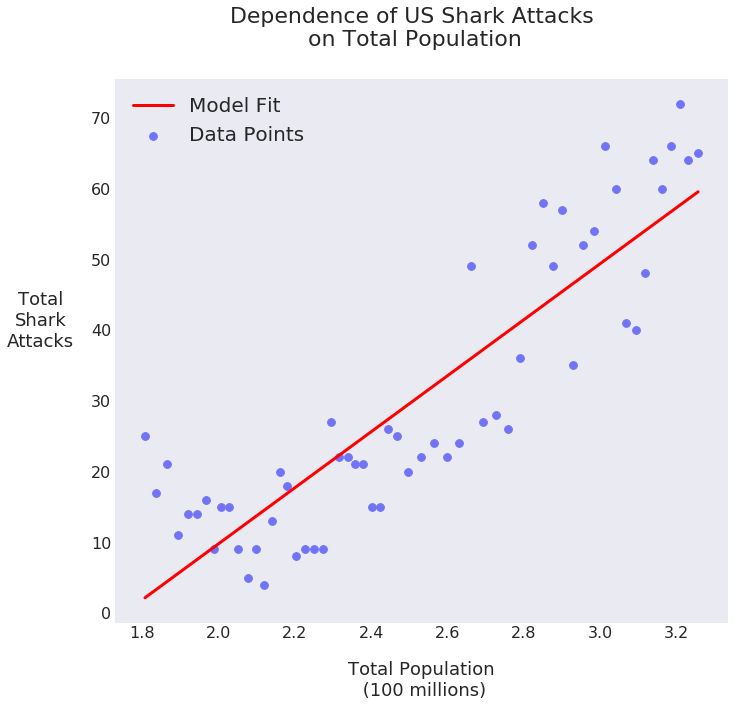

In [65]:
fig=plt.figure(figsize=(11,10))

plt.scatter(sharkAnalysis['Total Population'] / 100000000, sharkAnalysis['Total Attacks'],
            label='Data Points', s=60, color='#7173F6')



plt.plot(sharkAnalysis['Total Population'] / 100000000, intercept +  slope * sharkAnalysis['Total Population'] / 100000000, 
        color = 'r', linewidth = 3.0, label="Model Fit")

print("Fit Report: \n \tUncertainty on Y: +/- {:.2f}".format(RMSE) + 
      "\n \tIntercept: {:.2f} +/- {:.2f}".format(intercept, errInter)
      + "\n\tSlope: {:.2f} +/- {:.2f}".format(slope, errSlope) +
      "\n\tPearson Linear Correlation: {:.2f}".format(rval))




plt.suptitle("Dependence of US Shark Attacks\n on Total Population", fontsize=22)

plt.xlabel('Total Population\n (100 millions)', fontsize=18, labelpad=20)
plt.ylabel('Total\nShark\nAttacks', fontsize=18, rotation=0, labelpad=50)

plt.xticks(fontsize=16)
plt.yticks(fontsize=16)

plt.legend(prop={'size':20}, loc='best')

plt.savefig("AttacksPopulationRegression.png", bbox_inches="tight")

plt.show()

### Bootstrap Method

In [90]:
nanMask = ((~np.isnan(sharkAnalysis['Total Population'])) & 
           (~np.isnan(sharkAnalysis['Total Attacks'])))

xVals = sharkAnalysis.loc[nanMask, 'Total Population']
yVals = sharkAnalysis.loc[nanMask, 'Total Attacks']

slopeOrig, interceptOrig, rvalOrig, pvalOrig, stderrOrig = stats.linregress(xVals, yVals)


In [99]:
## run it 500 times :P
numIterations = 500

#create dictionary of bootstrap values
bootstrapVals = {}
bootstrapVals['rVals'] = np.zeros((numIterations))
bootstrapVals['Intercepts'] = np.zeros((numIterations))
bootstrapVals['Slopes'] = np.zeros((numIterations))

for i in range(numIterations):
    
    #resample the dataframe (frac = 1 means use all of the data ;)
    reSampled = sharkAnalysis[['Total Population',
                              'Total Attacks']].sample(frac = 1, replace = True)
    
    #create nan mask
    nanMask = ((~np.isnan(reSampled['Total Population'])) & 
           (~np.isnan(reSampled['Total Attacks'])))

    #new values of x, and y without nans
    xVals = reSampled.loc[nanMask, 'Total Population']
    yVals = reSampled.loc[nanMask, 'Total Attacks']

    #perform fit
    slope, intercept, rval, pval, stderr = stats.linregress(xVals, yVals)
    
    #and set up dictionay with the values
    bootstrapVals['rVals'][i] = rval
    
    bootstrapVals['Intercepts'][i] = intercept
    
    bootstrapVals['Slopes'][i] = slope

#print out final values
print("The mean rVal is {:.2f} with a standard deviation of {:.5f}.".format(
    np.mean(bootstrapVals['rVals']), 
    np.std(bootstrapVals['rVals'], ddof = 1)))

The mean rVal is 0.88 with a standard deviation of 0.02390.


### Histogram of r-values

The number of bins for the histogram is: 23.0
Skew: -0.3, Kurtosis: 2.9, Standard Dev: 0.0, Mean: 0.9


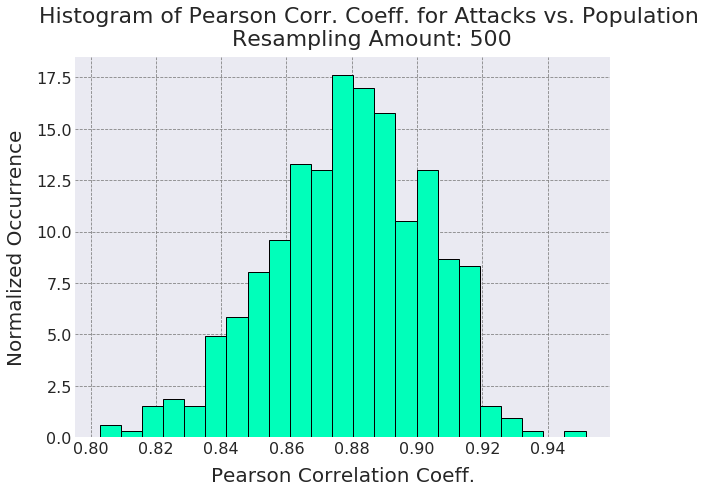

In [100]:
#set up the figure 
fig = plt.figure(figsize=(11, 7))

fig.suptitle('Histogram of Pearson Corr. Coeff. for Attacks vs. Population \n' + 
             'Resampling Amount: {}'.format(numIterations), 
             fontsize=22)

gs = plt.GridSpec(1, 1, hspace=0.2, wspace=0.0, right = 0.8)

#add subplots
ax1 = fig.add_subplot(gs[0,0])


sampleSize = len(bootstrapVals['rVals'])

# sqrt rule as minimum
numBins = np.ceil(np.sqrt(sampleSize))

print("The number of bins for the histogram is: {}".format(numBins))

#values is first entry, followed by number of bins, normed is the
#normalization factor, ie normalize to 1. 

#edgecolor and linewidth set up the bin edges
ax1.hist(bootstrapVals['rVals'], int(numBins), density = 1, facecolor = '#00FFBA', 
         edgecolor="k")

#set up grid
plt.grid(color='gray', linestyle='dashed')

#labels
plt.xlabel('Pearson Correlation Coeff.', fontsize = 20, labelpad=10)
plt.ylabel('Normalized Occurrence', fontsize = 20, labelpad=10)
#large ticks
plt.xticks(fontsize=16) #make the xaxis labels larger
plt.yticks(fontsize=16) #make the yaxis labels larger



#print out stats on the skew etc
print("Skew: {:.1f}, Kurtosis: {:.1f}, Standard Dev: {:.1f}, Mean: {:.1f}".format(
        skew(bootstrapVals['rVals']), 
        kurtosis(bootstrapVals['rVals'], fisher = False), 
        np.std(bootstrapVals['rVals'], ddof = 1), 
        np.mean(bootstrapVals['rVals'])))

plt.savefig("BootstrapHistogramPopulationAttacks.png", bbox_inches='tight')

plt.show()

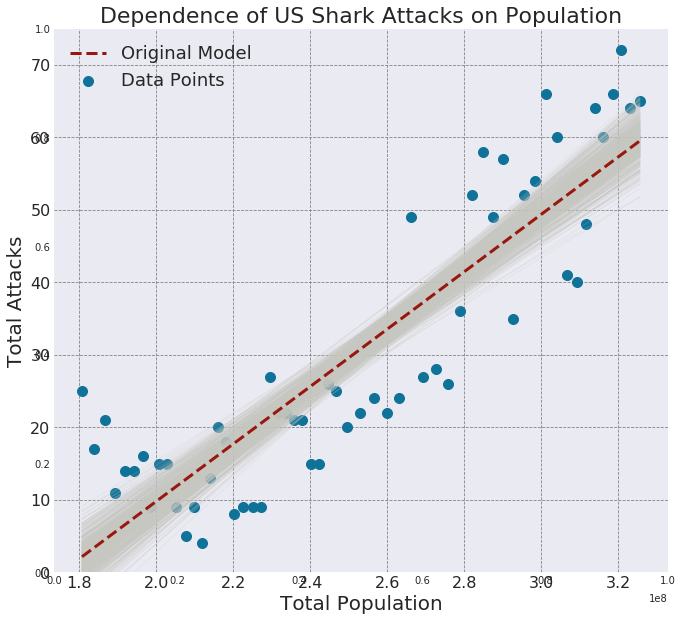

In [102]:
fig = plt.figure(figsize=(11, 10))

plt.title('Dependence of US Shark Attacks on Population', fontsize=22)

gs  = plt.GridSpec(1, 1, hspace=0.0, wspace=0.2, right = 0.9)

#add subplots
ax1 = fig.add_subplot(gs[0,0])

#set up titles for axis
ax1.set_xlabel('Total Population', fontsize = 20)
ax1.set_ylabel('Total Attacks', fontsize = 20)

#plot values
ax1.scatter(sharkAnalysis['Total Population'], sharkAnalysis['Total Attacks'],  
            color = '#0F7298', s = 100, label='Data Points')

#make line equally spaced
minVal  = np.nanmin(sharkAnalysis['Total Population'])
maxVal  = np.nanmax(sharkAnalysis['Total Population'])
spacing = (maxVal - minVal) / 20.0

#create new xarray for pretty plotting
xVals = np.arange(minVal, maxVal+spacing, int(spacing))

for slope, intercept in zip(bootstrapVals['Slopes'], bootstrapVals['Intercepts']):
    
    #calculate y values
    yModel = slope*xVals + intercept 
    
    #and plot in gray
    ax1.plot(xVals, yModel, color = '#C6C7C0', alpha = 0.2, lw = 1.0)
    
#plot final value in turquoise - 
yModelOrig = slopeOrig*xVals + interceptOrig

ax1.plot(xVals, yModelOrig, 
         color = '#98170F', alpha = 1.0, linestyle = '--', lw = 3.0,
        label='Original Model')


plt.legend(prop={'size': 18})

#set up grid
ax1.grid(color='gray', linestyle='dashed')

#set up label sizes
ax1.tick_params(labelsize = 16)

plt.ylim(0,75)

plt.savefig("BootstrapAttacksPopulation.png", bbox_inches="tight")

plt.show()